# **Ejemplo 1: Boxplots**

In [1]:
import seaborn as sns
import matplotlib as plt
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DataSets2-TCH/Remoto Datasets/Remoto melbourne_housing-clean.csv', index_col=0)

In [3]:
df.head()

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


<Axes: xlabel='price'>

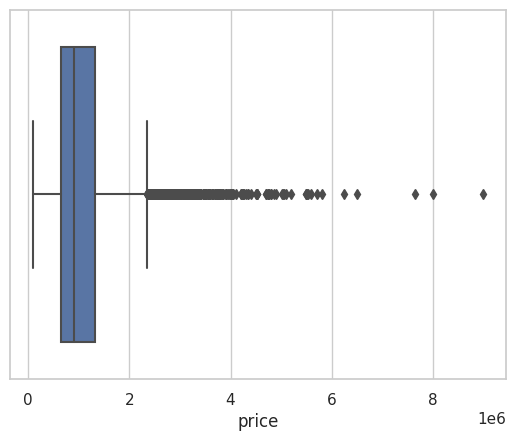

In [4]:
sns.set(style="whitegrid")
sns.boxplot(x=df['price'])

¿Qué significa todo esto?

La caja está delimitada por 2 valores: El percentil 25 y el percentil 75.
La línea vertical dentro de la caja indica el percentil 50 (o sea, la mediana).
Los "bigotes" intentan abarcar el resto de los datos a la izquierda y derecha de la caja, PERO no se extienden más allá de una distancia equivalente a 1.5 * Rango Intercuartílico. Como bien recordarás, el rango intercuartílico es la diferencia entre el percentil 75 y el percentil 25. Si multiplicamos 1.5 por ese Rango Intercuartílico obtenemos el tamaño máximo de los bigotes.
Los puntos individuales que están fuera de los bigotes son, obviamente, las muestras cuyo valor excede el tamaño máximo de los bigotes. No podemos tomar esto como una "Regla Absoluta", pero en general se considera que estos valores son los valores atípicos de nuestro conjunto.
Como puedes ver, esta gráfica nos da muchísima información muy útil.

Ahora sabemos que la mayoría de nuestros datos están concentrados en valores menores a 2 000 000 y que los precios muy altos son anomalías en nuestro conjunto.
Sabemos que, dentro del rango total de los datos, tenemos una distribución que tiende hacia los valores más pequeños.
También sabemos que nuestros datos en general están muy concentrados (o sea, poco dispersos), pero que hay una "colita" de datos hacia la derecha que se extiende bastante lejos.

<Axes: xlabel='price'>

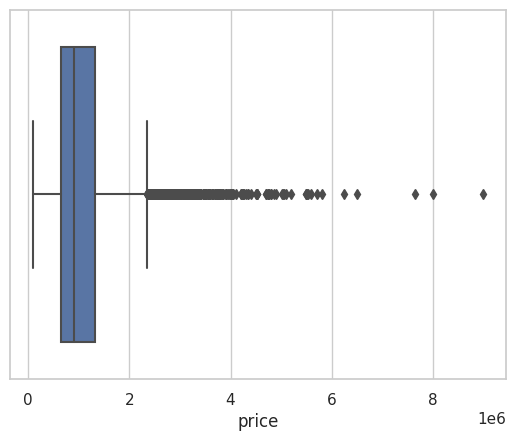

In [5]:
sns.set(style='whitegrid')
sns.boxplot(x=df['price'])
#plt.axvline(df['price'].mean(), c='y')

### **Rango Intercuartílico y valores atípicos**

Podemos utilizar la medida que utiliza el boxplot para limitar el tamaño de los bigotes y filtrar todos los datos que excedan ese límite. A esta medida se le suele llamar el Score de Rango Intercuartílico (IQR-Score). De esa manera estamos filtrando los valores atípicos (al menos lo que se considera valores atípicos bajo este esquema).

In [9]:
iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)
filtro_inf = df['price'] > df['price'].quantile(0.25) - (1.5 * iqr)
filtro_sup = df['price'] < df['price'].quantile(0.75) + (1.5 * iqr)

df_filtrado = df[filtro_inf & filtro_sup]
df_filtrado

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11640,Westmeadows,43 Bamford Av,4,h,821000.0,S,YPA,29/07/2017,16.5,3049.0,3.0,2.0,2.0,2004.0,Brimbank,-37.70525,144.75699,Northern Metropolitan,2474.0
11641,Whittlesea,30 Sherwin St,3,h,601000.0,S,Ray,29/07/2017,35.5,3757.0,3.0,2.0,2.0,1970.0,Manningham,-37.76311,145.10494,Northern Victoria,2170.0
11642,Williamstown,87 Pasco St,3,h,1285000.0,S,Jas,29/07/2017,6.8,3016.0,2.0,1.0,1.0,2010.0,Whittlesea,-37.68199,145.01744,Western Metropolitan,6380.0
11643,Yarraville,2 Adeney St,2,h,750000.0,SP,hockingstuart,29/07/2017,6.3,3013.0,3.0,2.0,2.0,1999.0,Darebin,-37.75948,144.99615,Western Metropolitan,6543.0


<Axes: xlabel='price'>

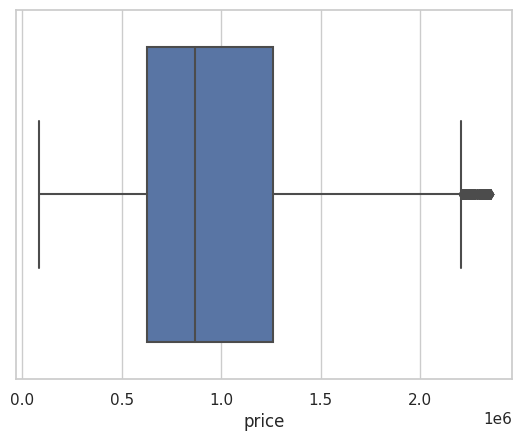

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df_filtrado['price'])

# **Ejemplo 2: Tabla de frecuencias**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSets2-TCH/Remoto Datasets/Remoto melbourne_housing-clean.csv', index_col=0)
df.head()

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
prices = df['price']
prices.max() - prices.min()

8915000.0

In [ ]:
pd.cut(prices, 20)

0        (1422250.0, 1868000.0]
1         (976500.0, 1422250.0]
2        (1422250.0, 1868000.0]
3          (530750.0, 976500.0]
4        (1422250.0, 1868000.0]
                  ...          
11641      (530750.0, 976500.0]
11642     (976500.0, 1422250.0]
11643      (530750.0, 976500.0]
11644    (2313750.0, 2759500.0]
11645      (530750.0, 976500.0]
Name: price, Length: 11646, dtype: category
Categories (20, interval[float64, right]): [(76085.0, 530750.0] < (530750.0, 976500.0] <
                                            (976500.0, 1422250.0] < (1422250.0, 1868000.0] < ... <
                                            (7217000.0, 7662750.0] < (7662750.0, 8108500.0] <
                                            (8108500.0, 8554250.0] < (8554250.0, 9000000.0]]

In [ ]:
segmentos = pd.cut(prices, 20)
df['price'].groupby(segmentos).count()

price
(76085.0, 530750.0]       1747
(530750.0, 976500.0]      4835
(976500.0, 1422250.0]     2664
(1422250.0, 1868000.0]    1278
(1868000.0, 2313750.0]     570
(2313750.0, 2759500.0]     261
(2759500.0, 3205250.0]     141
(3205250.0, 3651000.0]      67
(3651000.0, 4096750.0]      40
(4096750.0, 4542500.0]      16
(4542500.0, 4988250.0]      10
(4988250.0, 5434000.0]       5
(5434000.0, 5879750.0]       7
(5879750.0, 6325500.0]       1
(6325500.0, 6771250.0]       1
(6771250.0, 7217000.0]       0
(7217000.0, 7662750.0]       1
(7662750.0, 8108500.0]       1
(8108500.0, 8554250.0]       0
(8554250.0, 9000000.0]       1
Name: price, dtype: int64

# **Ejemplo 3: Histogramas**

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/DataSets2-TCH/Remoto Datasets/Remoto melbourne_housing-clean.csv', index_col=0)
df3.head()

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
sns.set(style="white")

<ipython-input-15-c74a10a8f4aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], kde=False, norm_hist=False, bins=20)


<Axes: xlabel='price'>

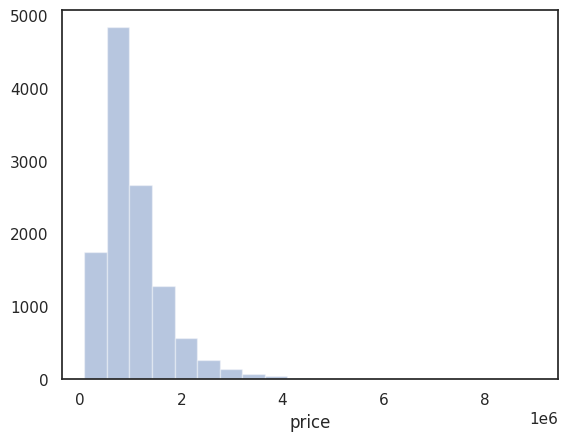

In [ ]:
sns.distplot(df['price'], kde=False, norm_hist=False, bins=20)

*  La bandera kde=False evita que se grafique también la densidad de probabilidad (que veremos más adelante).
*   norm_hist=False sirve para que nuestro eje y indique los conteos de nuestros segmentos.
*  bins=20 indica el número de segmentos.

<ipython-input-16-08d0ef3c5a97>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], kde=False, norm_hist=False, bins=100)


<Axes: xlabel='price'>

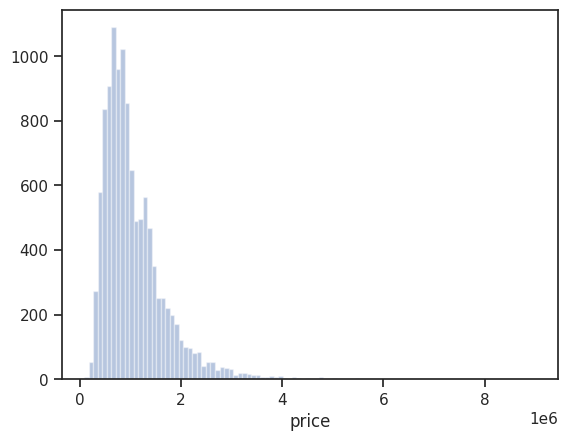

In [ ]:
sns.set(style="ticks")
sns.distplot(df['price'], kde=False, norm_hist=False, bins=100)

# **Ejemplo 4: Describiendo histogramas**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew, kurtosis

sns.set(style='white')

Distribución Normal (Standard Normal)

In [ ]:
normal = np.random.normal(loc=0, scale=5, size =10000)

<ipython-input-21-80508a4d4b4b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal, kde=False, norm_hist=False)


<Axes: >

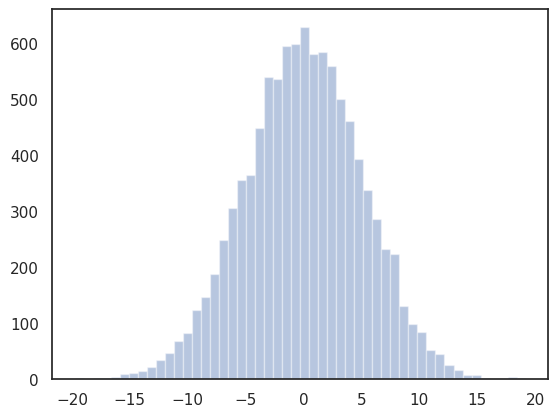

In [ ]:
sns.distplot(normal, kde=False, norm_hist=False)

In [ ]:
print(f'Curtosis: {kurtosis(normal)}')
print(f'Asimetría: {skew(normal)}')

Curtosis: -0.055425264034845156
Asimetría: -0.0514638417266248


Distribuciones de cola corta (short-tailed)

In [ ]:
cola_corta = np.array([2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8])

<ipython-input-24-075e90b60a28>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cola_corta, kde =False, norm_hist=False, bins=7)


<Axes: >

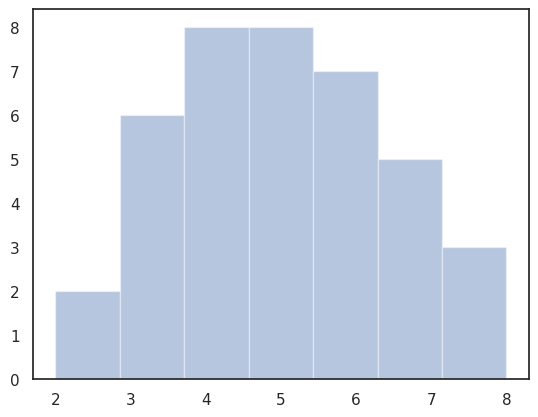

In [ ]:
sns.distplot(cola_corta, kde =False, norm_hist=False, bins=7)

In [ ]:
print(f'Curtosis: {kurtosis(cola_corta)}')
print(f'Asimetría: {skew(cola_corta)}')

Curtosis: -0.8509615384615383
Asimetría: 0.10598753694734905


Distribuciones de cola larga (fat-tailed)

In [ ]:
cola_larga = np.random.laplace(loc=0.0, scale=1, size=10000)

<ipython-input-27-ae21ef414f7f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cola_larga, kde=False, norm_hist=False)


<Axes: >

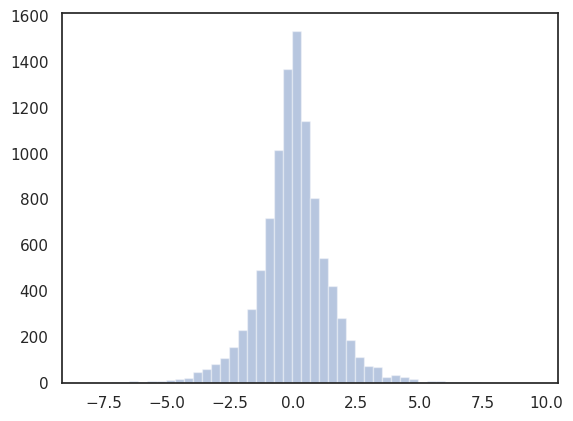

In [ ]:
sns.distplot(cola_larga, kde=False, norm_hist=False)

In [ ]:
print(f'Curtosis: {kurtosis(cola_larga)}')
print(f'Asimetría: {skew(cola_larga)}')

Curtosis: 3.081181159762065
Asimetría: 0.02641760280842341


Asimetría Positiva (right-skewed)

In [ ]:
asimetria_positiva = np.random.exponential(scale=1.0, size=10000)

<ipython-input-30-bdb14b432a55>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(asimetria_positiva, kde=False, norm_hist=False)


<Axes: >

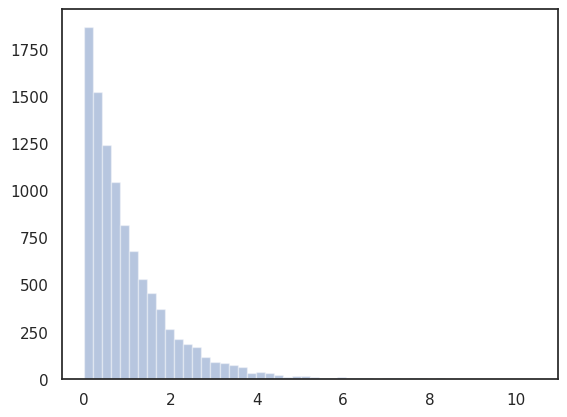

In [ ]:
sns.distplot(asimetria_positiva, kde=False, norm_hist=False)

In [ ]:
print(f'Curtosis: {kurtosis(asimetria_positiva)}')
print(f'Asimetría: {skew(asimetria_positiva)}')

Curtosis: 7.34092303526411
Asimetría: 2.1371216646066644


Asimetría negativa (left-skewed)

In [ ]:
asimetria_negativa = np.random.chisquare(4, size=10000)* -1

<ipython-input-34-84f36beb6b1a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(asimetria_negativa, kde=False, norm_hist=False)


<Axes: >

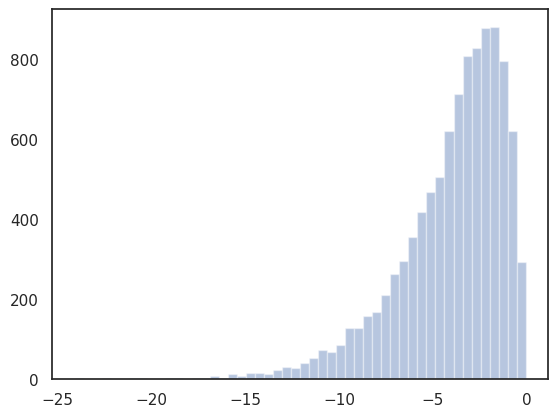

In [ ]:
sns.distplot(asimetria_negativa, kde=False, norm_hist=False)

In [ ]:
print(f'Curtosis: {kurtosis(asimetria_negativa)}')
print(f'Asimetría: {skew(asimetria_negativa)}')

Curtosis: 2.720429297970341
Asimetría: -1.3752923644739925


In [ ]:
cauchy = np.random.standard_cauchy(size=10000)

<ipython-input-38-c6ce4260e6c0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cauchy, kde=False, norm_hist=1000)


<Axes: >

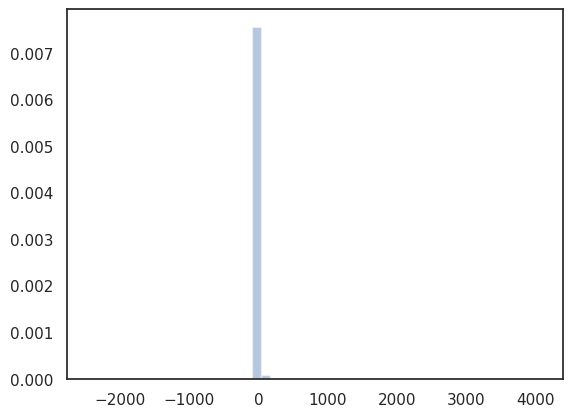

In [ ]:
sns.distplot(cauchy, kde=False, norm_hist=1000)

In [ ]:
print(f'Curtosis: {kurtosis(cauchy)}')
print(f'Asimetría: {skew(cauchy)}')

Curtosis: 2458.212050083419
Asimetría: 19.677883654978874


Distribución uniforme (uniform distribution)

In [ ]:
uniform = np.random.uniform(low=-1, high=0, size=10000)

<ipython-input-41-195a2cfa7818>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uniform, kde=False, norm_hist=False)


<Axes: >

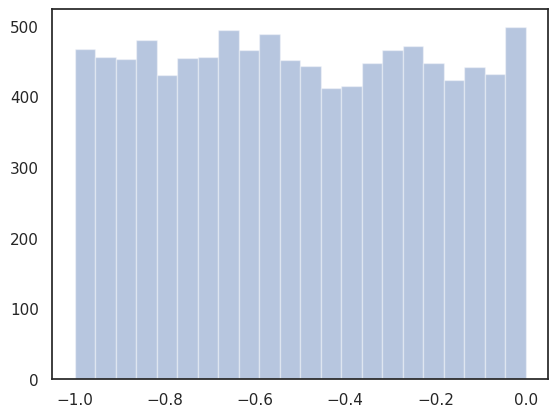

In [ ]:
sns.distplot(uniform, kde=False, norm_hist=False)

In [ ]:
print(f'Curtosis: {kurtosis(uniform)}')
print(f'Asimetría: {skew(uniform)}')

Curtosis: -1.1988144282869726
Asimetría: 0.021619654097033557


Distribución bimodal y multimodal

In [ ]:
normal_left = np.random.normal(loc=-2.5, scale=1, size=10000)
normal_right = np.random.normal(loc=2.5, scale=1, size=10000)
bimodal = np.concatenate([normal_left, normal_right])

<ipython-input-45-5c34820c3d2a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bimodal, kde=False, norm_hist=False)


<Axes: >

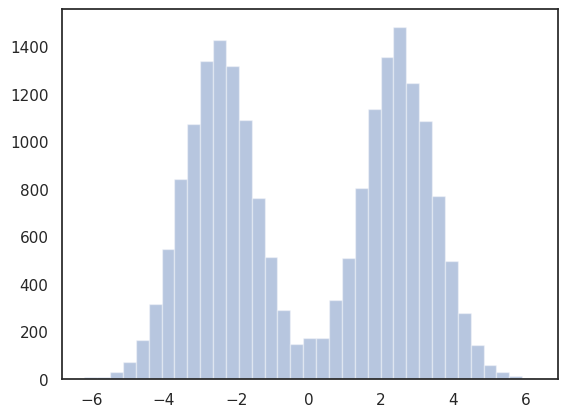

In [ ]:
sns.distplot(bimodal, kde=False, norm_hist=False)

In [ ]:
print(f'Curtosis: {kurtosis(bimodal)}')
print(f'Asimetría: {skew(bimodal)}')

Curtosis: -1.479962137504866
Asimetría: -0.0007328974324242668


# **Ejemplo 5: Gráficas de densidad**

In [ ]:
sns.set(style='whitegrid')

<ipython-input-52-cc4d2543f476>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laplace, hist=False)


<Axes: ylabel='Density'>

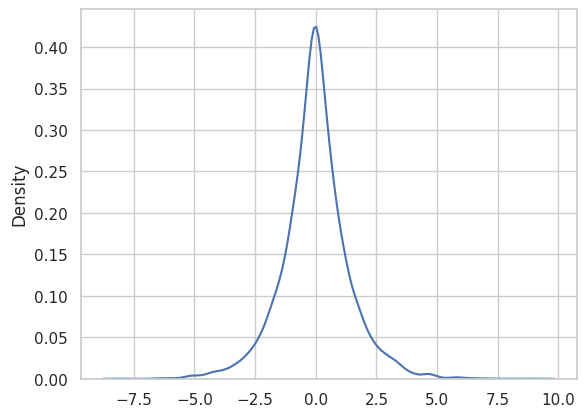

In [ ]:
laplace = np.random.laplace(loc=0.0, scale=1, size=10000)
sns.distplot(laplace, hist=False)

<ipython-input-53-51812328a72d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(chisquare, hist=False)


<Axes: ylabel='Density'>

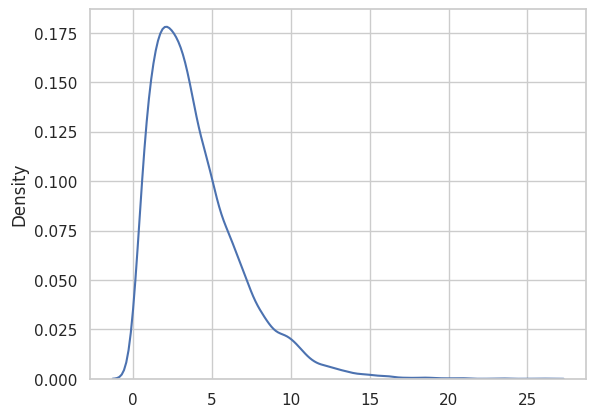

In [ ]:
chisquare = np.random.chisquare(4, size=10000)
sns.distplot(chisquare, hist=False)

<ipython-input-54-3a7c84170fbc>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal_1, hist=False, kde_kws={'shade': True})
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-54-3a7c84170fbc>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) o

<Axes: ylabel='Density'>

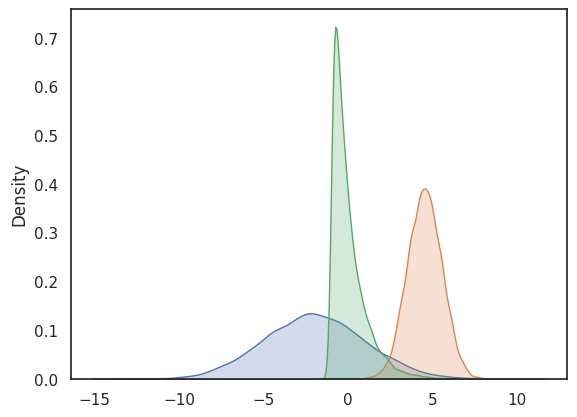

In [ ]:
sns.set(style='white')

normal_1 = np.random.normal(loc=-2, scale=3, size=10000)
normal_2 = np.random.normal(loc=4.5, scale=1, size=10000)
exponential = np.random.exponential(scale=1.0, size=10000) - 1

sns.distplot(normal_1, hist=False, kde_kws={'shade': True})
sns.distplot(normal_2, hist=False, kde_kws={'shade':True})
sns.distplot(exponential, hist=False, kde_kws={'shade':True})